# Validación Cruzada y Elección de Parámetros

En los ejemplos realizados para clasificación y regresión se dividió el conjunto de datos en dos submuestras. Con los datos de entrenamiento se estimó el modelo y se revisó la calidad del modelo con los datos de prueba.

&nbsp;
<img src="./Imagenes/Imagen_Total_Datos.jpg" height="700" width="800">
&nbsp;

Se mencionó en un inicio que el objetivo de Aprendizaje Automático es que sea capaz de elegirse el modelo que funcione adecuadamente ante nuevos datos, ese es el objetivo de llegar a la **generalización**.

Para tratar valorar el rendimiento del modelo ante nuevos datos, se usa la Validación Cruzada. Existen varias técnicas al respecto, pero la idea en general es la misma: dividir los datos en subconjunto de entrenamiento y prueba.

## K-Fold

Uno de los métodos más usados es dividir los datos en *k* submuestras, usar esa división para estimar y probar el modelo y al final dar la media la medida de rendimiento.

La división de los datos se realiza como se aprecia en la siguiente imagen:

![Imagen_De k-fold](Imagenes/Imagen_CV.png)
Si observamos los datos originales son divididos en *k* submuestras, posteriormente se va tomando cada uno como la submuestra de prueba y el resto como submuestra de entrenamiento. En cada etapa al validar con el correspondiente submuestra de prueba se estima algúna métrica que se consideró, por ejemplo puede ser la *precisión* para la clasificación o *MSE* para la regresión. 

Si nuestro caso fuera que aplicamos la validación cruzada para un modelo de regresión el resultado al final para calificar el rendimiento del modelo sería estimado como:$$CV=\frac{1}{k}\sum\limits_{i=1}^kMSE_i$$

## Ejemplo

Tomando los datos del ejemplo del modelo regresivo, aplicamos *Validación Cruzada* al modelo *Random Forest* para conocer rendimiento ante posibles nuevos datos.

Replicamos el código.

In [6]:
#Entono para exploració y tratamiento de los datos
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#configuracion Matplotlib
plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams['figure.titlesize'] = 'large'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize']=15

Datos=pd.read_csv("DataSets/energydata_complete.csv")

#Creación de datos para el modelo de clasificación

Datos_input=Datos.iloc[:,2:29].copy()
Y_output=Datos.iloc[:,1:2].copy()

#Se divide la muestra entre el conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

#Definimos tomar 80/20 train/test
X_train, X_test, y_train, y_test = train_test_split(Datos_input, Y_output,
                                                    test_size=0.20,
                                                    random_state=123,)

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

#Se define el modelo
Modelo_RF=RandomForestRegressor()
Modelo_RF.fit(X_train,y_train.values.ravel())
Pred_RF=Modelo_RF.predict(X_test)

print("Regresión Lineal")
print("El error cuadrado medio del modelo fue %f"%(mean_squared_error(y_test,Pred_RF)))

print("La R Cuadrada es de: %f"% Modelo_RF.score(X_test,y_test))

Regresión Lineal
El error cuadrado medio del modelo fue 5557.565493
La R Cuadrada es de: 0.465756


Aplicamos ahora Validación Cruzada dividiendo los datos en 5 submuestras. Se usa la función `cross_val_score` e indicamos la división con el parámetro `cv`.

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Modelo_RF, Datos_input, Y_output.values.ravel(),cv=5,scoring='neg_mean_squared_error')

Calculando la media de los valores estimados de $MSE$ se tiene:

In [13]:
print(np.mean(scores))

-24091.0407398


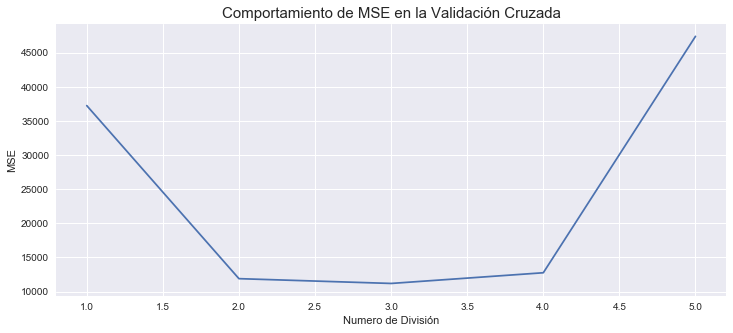

In [16]:
plt.plot(range(1,6),-1*scores)
plt.title("Comportamiento de MSE en la Validación Cruzada")
plt.ylabel("MSE")
plt.xlabel("Numero de División")

Se aprecia que el Error Cuadrado Médio (MSE) varía bruscamente entre las submuestras, además de que resulta en general muy alto. Esto indicaría que el modelo no sería un buen candidato.

**¿Solo k=5?** No hay una regla, pero suele recomendarse considerar k entre 5 y 10.

Si se cuenta con conjunto de modelos posibles, se aplica a cada uno la validación cruzada. Con ello uno puede tomar orientación para elegir el modelo que resulta más robusto ante nuevos datos.

## Elección de Parámetros

En los modelos que han mostrado para la clasificación y para la regresión, en ningún momento se ha revisado algún parámetro. Cada familia de modelos tiene algún conjunto de parámetros que resultan clave para tener buenas predicciónes.

Ejemplo, en la regresión lineal que se expresa como la ecuación: $$\hat{y}=a_1X_1+a_2X_2+a_3X_3+b$$
los parámetros ${a_1,a_2,a_3,b}$ son estimados. Esto depende del método que se use para estimar estos parámetros, en el modelo tradicional de la regresión se hace uso de mínimos cuadrados ordinarios, pero como tal no es el único método para elegir los valores de los parámetros.

Todos los algoritmos o modelos que se desarrollan en Aprendizaje Automático contienen algún conjunto de parámetros, la elección de sus valores se hace usando los datos de entrenamiento y se prueba si son buenos parámetros al evaluar la calidad de modelo contra los datos de prueba.

### Relación entre Validación Cruzada y Elección de Parámetros

Arriba se comentó que la intención de la Validación Cruzada era evaluar la calidad de modelo, pero al hacer eso también se esta explorando o revisando el posible [**sobre ajuste**]() que se haga con algún modelo, ya que se desea que sea capaz de responder bien ante datos que no se le dieron para entrenamiento.

Por otro lado, la elección de los parámetros busca elegir el mejor conjunto de valores de modo tal que el modelo tenga el mejor rendimiento posible. Esto incluye evitar elegir valores de los parámetros que impliquen sobre ajuste de los datos de entrenamiento. Una estrategia es dividir los datos en Datos de Entrenamiento, Datos de Validación y Datos de Prueba. Otro modo de dividir los datos, es usar el tipo de división que se hace en la validación cruzada y hacer la busqueda de los mejores parámetros en los k-submuestras.

La primera estrategía visualmente sería así:
![CV_1](Imagenes/CV_1.jpg)

La búsqueda de parámetros se realizaría en el conjunto de validación, donde tambien se realiza la validación cruzada. La segunda estrategia usual es dividir del siguiente modo:
![CV_2](Imagenes/Imagen_CV_GS.jpg)

La validación cruzada es una de las piezas más importantes igual que la elección de parámetros adecuados, ya que eso permite que el modelo pueda pasar a la etapa de la **generalización**. Las dos estrategias comentadas para buscar los parámetros implican costos computacionales diferentes, si se cuenta con una conjunto de datos bastante grande es posible que sea suficiente la primera estrategia y se evita el costo computacional de usar la segunda estrategia.

Las dos estrategias planteadas no son las únicas, siempre se tiene la libertan de definir el modo de definir la validación cruzada. Lo único que es importante cuidar al definir una estrategia de validación, es no mezclar los datos con la submuestra de prueba. 

### Técnicas de Búsqueda de Parámetros.

En general se usan dos técnicas en la búsqueda de parámetros, la búsqueda de los mejores parámetros desde un conjunto definido o una búsqueda aleatoria sobre una lista de parámetros. Lo nombre de estas dos técnicas son: *GridSearch y RandomizedSearch*.


### Combinando Todo

Con lo anterior se trató de explicar la relación entre la validación cruzada y la selección de parámetros, el último ingrediente es la medida o métrica  o scoring contra el cual se evalua el modelo. Al final siempre se evalua el modelo con los datos de prueba y se toma algún estadístico (MSE, $R^2$,Precisión, AUC) para calificar el rendimiento del modelo. Estonces se tien las 3 piezas juntas:

* Elegir una Estrategia de Validación Cruzada.
* Definir una estrategia de selección de parámetros.
* Elegir una métrica o estadístico con el cual calificar el rendimiento del modelo.



Se realizan un ejemplo para mostrar la combinación de las 3 piezas. Como modelo base se considera un Random Forest, así que los parámetros que se busca elegir es el número de árboles (n_estimators) y el número máximo de variables (max_features) a considerar para cada árbol. De momento no se explica cuál es el significado preciso de estos parámetros para los Random Forest, se explican más adelante. 

### Ejemplos

Se toman los datos `load_breast_cancer`. 

In [25]:
#Se cargan los datos
from sklearn.datasets import load_breast_cancer
Cancer=load_breast_cancer()

In [47]:
Cancer.data.shape

(569, 30)

In [42]:
#Se dividen los datos entre una muestra para entrenamiento y otra para prueba
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score # Se toman dos métricas para comparar los resultados.

#Se dividen los datos
X_train, X_test, y_train, y_test = train_test_split(Cancer.data, Cancer.target, random_state=1)

#Se define el modelo con los parámetros por default
RF=RandomForestClassifier()
#Se estima el RandomForest
RF.fit(X_train,y_train)
#Se realiza estima la salida desde los datos de prueba
Pred_RF=RF.predict(X_test)

#El rendimiento del modelo
print("La precisión de Modelo sin elegir parámetros es:")
print(accuracy_score(y_test,Pred_RF))
print()
print("El área bajo la curva es de:")
print(roc_auc_score(y_test,Pred_RF))

La precisión de Modelo sin elegir parámetros es:
0.965034965035

El área bajo la curva es de:
0.957954545455


Primero vemos cual es el rendimiento 

In [43]:
from sklearn.model_selection import cross_val_score

CV_RF= cross_val_score(RF, Cancer.data, Cancer.target, cv=5,scoring='accuracy')

print("El resultado de la validación cruzada es: %f"%CV_RF.mean())


El resultado de la validación cruzada es: 0.945687


Se hace el mismo ejercicio pero camiando la métrica, en lugar de la precisión (accuracy) se usa el área bajo la curva (roc_auc).

In [44]:
CV_RF= cross_val_score(RF, Cancer.data, Cancer.target, cv=5,scoring='roc_auc')

print("El resultado de la validación cruzada es: %f"%CV_RF.mean())


El resultado de la validación cruzada es: 0.985061


Muestra que la calidad del modelo con los parámetros por default da buen rendimeinto. Los parámetros por defecto son:

In [46]:
RF.max_features,RF.n_estimators

('auto', 10)

En el caso de número de variable o característica a considerar es :  $\sqrt(num\quad de\quad variables)$ en este caso se tienen 30 variables. Por lo cual se consideró apróximadamente *max_features=5*.

Ahora aplicamos la primera estrategia de validación cruzada y selección de parámetros, considerando como estadístico *auc*(roc_auc).

In [51]:
from sklearn.model_selection import  ShuffleSplit,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [20,50,100,300], 'max_features': [3,4,5,6,7,10]}

single_split_cv = ShuffleSplit(n_splits=1)
grid = GridSearchCV(RF, param_grid=param_grid, cv=single_split_cv,scoring='roc_auc')


grid.fit(X_train, y_train)
Pred_RF_1=grid.predict(X_test)
print("La precisión del modelo es: %f"% accuracy_score(y_test,Pred_RF_1))
print("El área bajo la curva es: %f" %roc_auc_score(y_test,Pred_RF_1))
print("Los mejore parámetros fueron:")
grid.best_params_

La precisión del modelo es: 0.965035
El área bajo la curva es: 0.957955
Los mejore parámetros fueron:


{'max_features': 5, 'n_estimators': 50}

Usando la segunda estrategia de validación cruzada  con k=5, se tiene:

In [53]:
grid_2 = GridSearchCV(RF, param_grid=param_grid, cv=5,scoring='roc_auc')


grid_2.fit(X_train, y_train)
Pred_RF_2=grid_2.predict(X_test)
print("La precisión del modelo es: %f"% accuracy_score(y_test,Pred_RF_2))
print("El área bajo la curva es: %f" %roc_auc_score(y_test,Pred_RF_2))
print("Los mejore parámetros fueron:")
grid_2.best_params_

La precisión del modelo es: 0.958042
El área bajo la curva es: 0.952273
Los mejore parámetros fueron:


{'max_features': 5, 'n_estimators': 50}

Se aprecia que los mejores parámetros en este caso fue el mismo con las dos estrategias de validación cruzada. Hay dos observaciones, la primera es que se observa que la precisión y el valor de auc es diferentes en las dos estimaciones. Esto se debe a que el modelo es estadístico, por lo cual se tienen ligeras variaciones pero no son drasticas.

*¿Qué pasa si consideramos en lugar de 'roc_auc', solo la precisión?*

In [54]:
grid_3 = GridSearchCV(RF, param_grid=param_grid, cv=single_split_cv,scoring='accuracy')

grid_3.fit(X_train, y_train)
Pred_RF_3=grid_3.predict(X_test)
print("La precisión del modelo es: %f"% accuracy_score(y_test,Pred_RF_3))
print("El área bajo la curva es: %f" %roc_auc_score(y_test,Pred_RF_3))
print("Los mejore parámetros fueron:")
grid_3.best_params_

La precisión del modelo es: 0.951049
El área bajo la curva es: 0.946591
Los mejore parámetros fueron:


{'max_features': 10, 'n_estimators': 50}

In [55]:
grid_4 = GridSearchCV(RF, param_grid=param_grid, cv=5,scoring='accuracy')

grid_4.fit(X_train, y_train)
Pred_RF_4=grid_4.predict(X_test)
print("La precisión del modelo es: %f"% accuracy_score(y_test,Pred_RF_4))
print("El área bajo la curva es: %f" %roc_auc_score(y_test,Pred_RF_4))
print("Los mejore parámetros fueron:")
grid_4.best_params_

La precisión del modelo es: 0.951049
El área bajo la curva es: 0.943182
Los mejore parámetros fueron:


{'max_features': 4, 'n_estimators': 20}

Se aprecia que los resultados son diferentes, la precisión es practicamente la misma para los dos métodos pero difieren en el valor de AUC. 

Ahora se tiene 3 posibles candidatos como modelos de Random Forest:

*  max_features= 4, n_estimators= 20
*  max_features=10, n_estimators= 50
*  max_features= 5, n_estimators= 50

Entonces el problema no solo es elegir entre el tipo de modelo, sino también sobre el tipo de estadístico contra el cual elegimos. En este caso por el tipo de datos se busca distinguir entre las pacientes que tienen Cáncer de Mama. La precisión es importante, pero como se mencionó en antes, la precisión no es sensible a qué tan mal se clasificaron las dos clases. Para este caso importa cuidar los falsos positivos y falsos negativos. Es decir, importa cuidar el diagnóstico de aquellos que pueden ser avisadas que tienen cancer de mama pero es un error y aquellos que son clasificados como sanas, pero que si tienen la enfermedad.

Resumen, es mejor elegir en este caso la métrica auc, porque es sensible a los falsos positivos y falsos negativos.

Así el modelo elegido es el último:

* Random Forest con max_features= 5, n_estimators= 50